In [1]:
import numpy as np 
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt

# 1. Donut problem

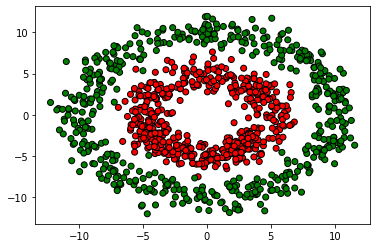

In [14]:
N = 1000
D = 2

R_inner = 5
R_outer = 10

# distance from origin is radius + random normal
# angle theta is uniformly distributed between (0, 2pi)
R1 = np.random.randn(N//2) + R_inner
theta = 2*np.pi*np.random.random(N//2)
X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

R2 = np.random.randn(N//2) + R_outer
theta = 2*np.pi*np.random.random(N//2)
X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

X = np.concatenate([ X_inner, X_outer ])
T = np.array([0]*(N//2) + [1]*(N//2)) # labels: first 50 are 0, last 50 are 1

color_arr = ["red" if t == 0 else "green" for t in T]
plt.scatter(X[:,0], X[:,1], c=color_arr, edgecolor="black")
plt.show()

In [41]:
# add a column of ones
# ones = np.array([[1]*N]).T # old
ones = np.ones((N, 1))

# add a column of r = sqrt(x^2 + y^2)
# feature engineering
r = np.sqrt( (X * X).sum(axis=1) ).reshape(-1, 1)
Xb = np.concatenate((ones, r, X), axis=1)

# randomly initialize the weights
w = np.random.randn(D + 2)

# calculate the model output
z = Xb.dot(w)

def sigmoid(z):
    return 1/(1 + np.exp(-z))


Y = sigmoid(z)

# calculate the cross-entropy error
def cross_entropy(T, Y):
    return -(T*np.log(Y) + (1-T)*np.log(1-Y)).sum()

In [42]:
# let's do gradient descent 100 times
learning_rate = 0.0001
error = []
for i in range(100):
    e = cross_entropy(T, Y)
    error.append(e)
    if i % 10 == 0:
        print(e)

    # gradient descent weight udpate with regularization
    w += learning_rate * ( Xb.T.dot(T - Y) - 0.1*w )

    # recalculate Y
    Y = sigmoid(Xb.dot(w))

7509.1238446250345


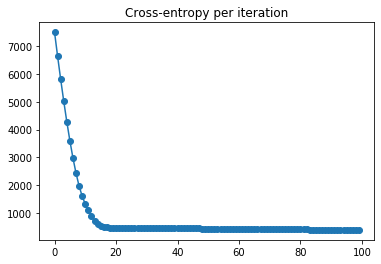

In [43]:
plt.plot(error, marker="o")
plt.title("Cross-entropy per iteration")
plt.show()

In [44]:
print("Final w:", w)
print("Final classification rate:", 1 - np.abs(T - np.round(Y)).sum() / N)

Final w: [-2.11553242  0.34207637  0.00949013  0.02058276]
Final classification rate: 0.945


In [121]:
# without the feature engineering it wont be possible for the logistic regression to do the classification here

# can we plot the decision boundary of this classifier
grid_num = 200
xx = np.linspace(start=-12.0, stop=12.0, num=grid_num)
yy = np.linspace(start=-12.0, stop=12.0, num=grid_num)

In [122]:
points = []
for xi in xx:
    for yi in yy:
        points.append([xi, yi])

points = np.array(points)

r = np.sqrt( (points * points).sum(axis=1) ).reshape(-1, 1)
points = np.hstack((np.ones((grid_num*grid_num, 1)), r, points))

In [123]:
y_pred = sigmoid(points.dot(w))

In [124]:
y_pred[y_pred < .5] = 0
y_pred[y_pred >=.5] = 1

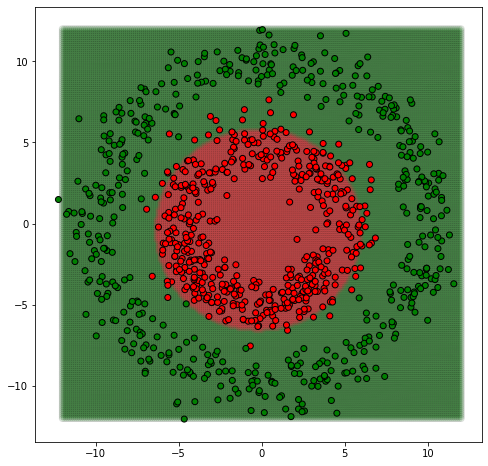

In [127]:
plt.figure(figsize=(8, 8))
color_arr = ["red" if t == 0 else "green" for t in y_pred]
plt.scatter(points[:, 2], points[:, 3], c=color_arr, edgecolor="black", alpha=.1)
color_arr = ["red" if t == 0 else "green" for t in T]
plt.scatter(X[:,0], X[:,1], c=color_arr, edgecolor="black")
plt.show()

# 2. Logistic Visualization

In [128]:
N = 100
D = 2


X = np.random.randn(N,D)

# center the first 50 points at (-2,-2)
X[:50,:] = X[:50,:] - 2*np.ones((50,D))

# center the last 50 points at (2, 2)
X[50:,:] = X[50:,:] + 2*np.ones((50,D))

# labels: first 50 are 0, last 50 are 1
T = np.array([0]*50 + [1]*50)

# add a column of ones
# ones = np.array([[1]*N]).T
ones = np.ones((N, 1))
Xb = np.concatenate((ones, X), axis=1)

def sigmoid(z):
    return 1/(1 + np.exp(-z))

# get the closed-form solution
w = np.array([0, 4, 4])

In [129]:
# calculate the model output
z = Xb.dot(w)
Y = sigmoid(z)

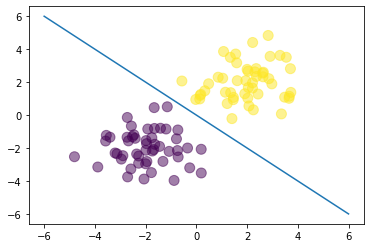

In [130]:
plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5)

x_axis = np.linspace(-6, 6, 100)
y_axis = -x_axis
plt.plot(x_axis, y_axis)
plt.show()

# 3. XOR problem with Logistic Regression

In [131]:
N = 4
D = 2

# XOR
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])
T = np.array([0, 1, 1, 0])

# add a column of ones
# ones = np.array([[1]*N]).T
ones = np.ones((N, 1))

# add a column of xy = x*y
xy = (X[:,0] * X[:,1]).reshape(N, 1)
Xb = np.concatenate((ones, xy, X), axis=1)

# randomly initialize the weights
w = np.random.randn(D + 2)

# calculate the model output
z = Xb.dot(w)

def sigmoid(z):
    return 1/(1 + np.exp(-z))


Y = sigmoid(z)

In [132]:
# calculate the cross-entropy error
def cross_entropy(T, Y):
    E = 0
    for i in range(len(T)):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

In [133]:
# let's do gradient descent 100 times
learning_rate = 0.01
error = []
for i in range(10000):
    e = cross_entropy(T, Y)
    error.append(e)
    if i % 1000 == 0:
        print(e)

    # gradient descent weight udpate with regularization
    w += learning_rate * ( Xb.T.dot(T - Y) - 0.01*w )

    # recalculate Y
    Y = sigmoid(Xb.dot(w))

3.1098894778702855
1.7443628954606898
1.2497930283528305
0.9885232463916594
0.8362373667788874
0.7407773311205503
0.6777129522821408
0.6344418865744026
0.6039218683777619
0.5819547705696959


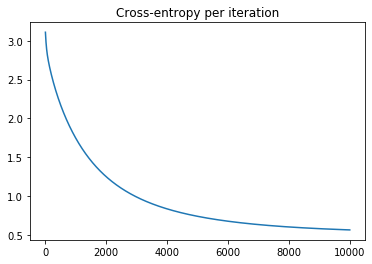

In [137]:
plt.plot(error)
plt.title("Cross-entropy per iteration")
plt.show()

In [135]:
print("Final w:", w)
print("Final classification rate:", 1 - np.abs(T - np.round(Y)).sum() / N)

Final w: [-1.48865607 -7.69610027  3.41828002  3.41828005]
Final classification rate: 1.0


# 4. Bad XOR

In [138]:
N = 4
D = 2

# XOR
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])
T = np.array([0, 1, 1, 0])

# add a column of ones
ones = np.ones((N, 1))

# add a column of xy = x*y
Xb = np.concatenate((ones, X), axis=1)

# randomly initialize the weights
w = np.random.randn(D + 1)

# calculate the model output
z = Xb.dot(w)

def sigmoid(z):
    return 1/(1 + np.exp(-z))


Y = sigmoid(z)

# calculate the cross-entropy error
def cross_entropy(T, Y):
    return -(T*np.log(Y) + (1-T)*np.log(1-Y)).sum()

In [140]:
# let's do gradient descent 100 times
learning_rate = 0.001
error = []
w_mags = []
for i in range(100000):
    e = cross_entropy(T, Y)
    error.append(e)
    if i % 10000 == 0:
        print(e)

    # gradient descent weight udpate with regularization
    w += learning_rate * Xb.T.dot(T - Y)

    w_mags.append(w.dot(w))

    # recalculate Y
    Y = sigmoid(Xb.dot(w))

2.772588722239781
2.772588722239781
2.772588722239781
2.772588722239781
2.772588722239781
2.7725887222397816
2.772588722239781
2.772588722239781
2.7725887222397816
2.7725887222397816


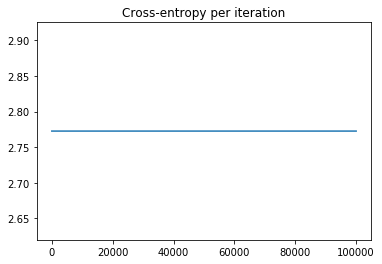

In [141]:
plt.plot(error)
plt.title("Cross-entropy per iteration")
plt.show()

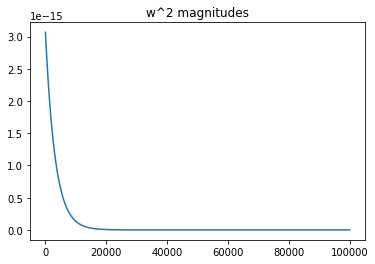

In [142]:
plt.plot(w_mags)
plt.title("w^2 magnitudes")
plt.show()

In [143]:
print("Final w:", w)
print("Final classification rate:", 1 - np.abs(T - np.round(Y)).sum() / N)

Final w: [ 0. -0. -0.]
Final classification rate: 0.75
